# 神经网络：快速建模与保存模型

导入全局模块

In [1]:
import torch
import torch.nn as neural
from matplotlib import pyplot
from matplotlib.animation import FuncAnimation
import pandas

随机产生训练集

In [2]:
# 生成一个 100R×2C 的二维基准张量
plot_base = torch.ones(100, 2)
# 以点(3, 3)为中心、坐标标准差为1，生成类别A的散点坐标集
x_A = torch.normal(3 * plot_base, 1)
# 为类别A贴上标签0
y_A = torch.zeros(100)
# 以点(-3, -3)为中心、坐标标准差为1，生成类别B的散点坐标集
x_B = torch.normal(-3 * plot_base, 1)
# 为类别B贴上标签1
y_B = torch.ones(100)
# 将2组坐标按列合并为一个 200R×2C 32位浮点训练集
x = torch.cat((x_A, x_B)).type(torch.FloatTensor)
# 将标签也同样地进行合并，并转换为64位整型训练集
y = torch.cat((y_A, y_B)).type(torch.LongTensor)
table = pandas.DataFrame({
    'X': x.data.numpy()[:, 0],
    'Y': x.data.numpy()[:, 1],
    'Class': y.data.numpy()
})
table.style

,X,Y,Class
0,3.26861,2.28534,0
1,3.40757,1.79304,0
2,2.88767,3.87373,0
3,3.51353,4.28599,0
4,1.68918,4.40804,0
5,5.60477,2.85323,0
6,4.8323,2.10882,0
7,0.604069,3.54853,0
8,2.5288,4.58312,0
9,4.52729,4.20265,0


创建神经网络模型

In [3]:
# 全连接神经网络提供层序搭建法，只需指明每一层使用的映射关系即可
model = neural.Sequential(
    # 首次映射：从输入层到隐含层
    neural.Linear(2, 10),
    # 激励函数（压缩函数）也可以当作一个隐含层
    neural.Sigmoid(),
    neural.Linear(10, 2),
    neural.Sigmoid()
)

定义参数优化器和损失函数

In [4]:
# 使用 随机梯度下降 进行参数优化，并指定 学习率（超参数）
optimizer = torch.optim.SGD(model.parameters(), lr=10)
# 使用 交叉熵 作为损失函数
loss_function = torch.nn.CrossEntropyLoss()

展示初始分类结果

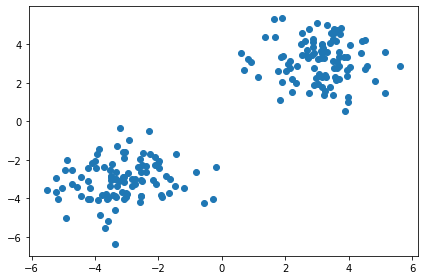

In [5]:
# 生成空白画布
(figure, axes) = pyplot.subplots()
# 自动调整图表到最佳状态
figure.set_tight_layout(True)
# 获取屏幕分辨率
screen_dpi = figure.get_dpi()
# 绘制散点图
axes.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1])

执行训练，指定超参数 训练次数 为100。

In [6]:
for i in range(10):
    # 获得模型输出
    out = model.forward(x)
    # 计算损失度
    loss = loss_function(out, y)

    # 梯度归零
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 执行优化
    optimizer.step()

输出分类结果

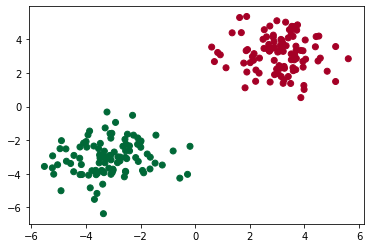

In [7]:
prediction = torch.max(out, 1)[1]
pred_y = prediction.data.numpy().squeeze()
target_y = y.data.numpy()
pyplot.scatter(
    x.data.numpy()[:, 0],
    x.data.numpy()[:, 1],
    c=pred_y,
    cmap='RdYlGn'
)

获得训练各连结权重和激发下限

In [8]:
for (name, value) in model.named_parameters():
    print(name, value, sep='\n', end='\n\n')

0.weight
Parameter containing:
tensor([[-0.8230, -0.7489],
        [-0.8403, -0.5495],
        [-0.4588, -0.4782],
        [-0.3995, -0.9092],
        [-0.5540, -0.5305],
        [ 0.5011,  0.5924],
        [-0.9037, -0.1109],
        [ 1.0385,  0.3914],
        [-0.3522, -0.9069],
        [ 0.3851,  0.8634]], requires_grad=True)

0.bias
Parameter containing:
tensor([-0.5576, -0.2641, -0.5783, -0.2505, -0.4219,  0.4280,  0.1580,  0.2770,
         0.4626,  0.1680], requires_grad=True)

2.weight
Parameter containing:
tensor([[-1.0089, -0.8672, -0.3504, -1.1946, -0.5931,  0.7691, -0.6370,  1.5376,
         -0.5100,  1.3208],
        [ 1.3304,  1.0255,  0.6565,  0.5055,  0.7020, -1.1309,  0.3247, -1.2707,
          0.8638, -0.9255]], requires_grad=True)

2.bias
Parameter containing:
tensor([ 0.4065, -0.6580], requires_grad=True)



获得分类概率

In [9]:
pandas.DataFrame(out.data.numpy(), columns=['X', 'Y']).style

,X,Y
0,0.975861,0.0255867
1,0.974381,0.027236
2,0.978299,0.0227655
3,0.979417,0.0216606
4,0.976165,0.024424
5,0.979759,0.0214265
6,0.978351,0.0229798
7,0.96459,0.0349199
8,0.978467,0.0224403
9,0.979991,0.0211234


存储模型至Pickle文件

In [10]:
torch.save(model, '../models/Classification.pkl')

D:\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
D:\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
D:\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sigmoid. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
